#Ecuaciones diferenciales en derivadas parciales

Desde el punto de vista de la matemática, las ecuaciones diferenciales en derivadas parciales (EDP) se distinguen de las EDO en que tienen un número de variables independientes mayor a uno.
Las ecuaciones involucran a las funciones que queremos determinar y derivadas parciales de las mismas respecto a las variables independientes.

Nuestra comprensión de los mecanismos que gobiernan el mundo natural está basada, en gran parte, en el uso de ecuaciones en derivadas parciales. Las EDP aparecen en la descripción de una gran variedad de procesos físicos:
- **Vibraciones de sólidos**
- **Flujo de fluidos**
- **Difusión de químicos**
- **Propagación del Calor**
- **Estructura de átomos y moléculas**
- **Interacción de la radiación con la materia**
- **Radiación de ondas electromagnéticas**

Varias de las ecuaciones de la física se escriben en términos de EDP:
* [Ecuaciones de Maxwell](https://es.wikipedia.org/wiki/Ecuaciones_de_Maxwell) (electromagnetismo)
* [Ecuación de Schrödinger](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Schr%C3%B6dinger) (mecánica cuántica)
* [Ecuaciones de Navier-Stokes](https://es.wikipedia.org/wiki/Ecuaciones_de_Navier-Stokes) (fluídos)
* [Ecuación del calor](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_del_calor)
* ...

Las EDP se han estudiado durante siglos. Euler, Laplace y Fourier hicieron las primeras contribuciones en los siglos 18 y 19. Desde entonces se ha continuado trabajando para desarrollar métodos de resolución analíticos y numéricos:
- Separación de variables
- Transformada de Fourier
- Transformada de Laplace
- Funciones de Green
- Diferencias finitas
- Elementos finitos
- Descomposición espectral
- ...

Las EDP suelen ser mucho más complejas de resolver que las EDO. Desde el punto de vista del cálculo numérico, vamos a tener que tener en cuenta varias cosas:

* Hay que hacer una discretización (se le llama *mallado* para las coordenadas espaciales) de todas las variables independientes.
* La precisión de los cálculos depende de la forma en que se hace la discretización (no solo de cuan fina es).
* Para poder resolver el problema hay que definir las condiciones de contorno espaciales apropiadas (Dirichlet, von Neumann, etc.).
* Para problemas dependientes del tiempo hay que definir una condición inicial consistente con las condiciones de contorno.
* Hay que asegurarse de que el método que se está usando sea estable. Que no oscilen las soluciones cuando no tienen que hacerlo o que no diverjan.
* El método tiene que converger a la solución verdadera a medida que se achica la discretización.
* Algunos procesos ocurren en un rango de escalas espaciales que puede abarcar varios órdenes de magnitud. Es necesario entonces entender bien qué escalas de longitud son relevantes a la hora de discretizar.
* Lo mismo ocurre con las escalas de tiempo. Si hacemos el paso de tiempo muy chico, la simulación se va a hacer demasiado costosa computacionalmente. Si lo hacemos demasiado largo, podemos perdernos parte de la física. Además, algunos métodos se vuelven inestables cuando el paso de tiempo es demasiado grande.


La buena noticia es que hay una gran variedad de métodos disponibles, y librerías que los aplican, con bases teóricas sólidas. Hay muchos investigadores que se especializan en la resolución de EDP, que  sigue siendo un campo de investigación. Por ejemplo, estos trabajos recientes sobre el uso herramientas de aprendizaje automático (machine learning) para resolver EDP tienen más de mil citas cada uno <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1)<a name="cite_ref-1"></a>[<sup>[2]</sup>](#cite_note-1).


<a name="cite_note-1"></a>1. [^](#cite_ref-1) Han, Jiequn, Arnulf Jentzen, and Weinan E. "[Solving high-dimensional partial differential equations using deep learning](https://doi.org/10.1073/pnas.1718942115)." Proceedings of the National Academy of Sciences 115.34 (2018): 8505-8510.

<a name="cite_note-1"></a>2. [^](#cite_ref-2) Karniadakis, George Em, et al. "[Physics-informed machine learning](https://doi.org/10.1038/s42254-021-00314-5)" Nature Reviews Physics 3.6 (2021): 422-440.


#Clasificación de las Ecuaciones en Derivadas Parciales


Se han establecido varios tipos de clasificación:
- El orden de la derivada máxima que aparece en las ecuaciones, determina el orden de las EDP.
- Si aparecen productos de las variables dependientes o de sus derivadas, se las clasifica como *no lineales*.
    - $\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$, es no lineal
- Si no aparecen productos las ecuaciones son lineales. Eso quiere decir que una combinación lineal de soluciones es una solución, lo que permite hacer por ejemplo un análisis de Fourier y considerar cada modo por separado.

Las ecuaciones de segundo orden lineales se clasifican en Elípticas, Parabólicas e Hiperbólicas:

| Tipo       | Comportamiento                                             | Ejemplo                                          | Aplicaciones en Física                       |
|------------|------------------------------------------------------------|--------------------------------------------------|----------------------------------------------|
| Elíptica   | Soluciones suaves | Ecuación de Laplace $\nabla^2 u = 0$          | Potencial eléctrico o gravitatorio (sin fuentes)          |
| Parabólica | Difusión| Ecuación del calor $\frac{\partial u}{\partial t} = \alpha \nabla^2 u$ | Conducción de calor, difusión de sustancias |
| Hiperbólica| Comportamiento ondulatorio, propagación a velocidades finitas  | Ecuación de ondas $\frac{\partial^2 u}{\partial t^2} = c^2 \nabla^2 u$ | Ondas electromagnéticas, ondas sonoras       |


El comportamiento de la EDP no lineales puede ser muy complejo y no se conoce un método genérico que pueda tratarlas. Hay que analizar cada caso por separado.


## Ecuación del calor en una dimensión espacial

La ecuación del calor o difusión modela cómo se distribuye el calor en un objeto sólido a lo largo del tiempo. Para un material homogéneo e isotrópico tenemos:

$$ \frac{\partial u}{\partial t} - D \nabla^2 u = 0 $$

donde $u(x,y,z,t)$ representa el valor que toma la temperatura en función de las variables independientes tiempo $t$ y posición $(x,y,z)$, $D$ es el coeficiente de difusión térmica, y  
$$
\nabla^2 = \frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2}
$$

es el operador laplaciano.

Vamos a considerar la ecuación del calor o difusión en una dimensión espacial:
$$ \frac{\partial u}{\partial t} - D\frac{\partial^2 u}{\partial x^2} = 0. $$
Una información importante a tener en cuenta, es que la ecuación es lineal (como la ecuación de ondas). Si tenemos dos soluciones, la suma de las mismas es solución también y una solución no deja de serlo si la multiplicamos por un número.

Si buscamos soluciones independientes del tiempo $\frac{\partial u}{\partial t}=0$, nos queda que se tiene que anular el lapaciano, como ocurre en un problema de electrostática sin fuentes (cargas).

La solución es lineal en $x$:
$$
u^*(x) = a x + b
$$
con $a$ y $b$ dos constantes que están determinadas por las condiciones de borde.

Si partimos de una condición inicial que **no** satisface $\frac{\partial^2 u}{\partial x^2}=0$, vamos a tener una evolución temporal de $u$. En este problema, lo que se obtiene es que esa evolución lleva al sistema a una situación de equilibrio.
* **¿Qué ocurriría si en lugar de una derivada primera en el tiempo hubiera una derivada segunda?**



Para hacer nuestra simulación nos va a interesar saber cuál es el tiempo característico de la dinámica del sistema (en este caso el tiempo de la relajación al equilibrio). Si analizamos las dimensiones de la ecuación del calor, vemos que:

$$
\frac{[u]}{[\tau]}\frac{\partial \tilde{u}}{\partial \tilde{t}} - D \frac{[u]}{[L^2]} \frac{\partial^2 \tilde{u}}{\partial \tilde{x}^2} = 0. $$

donde $[\tau]$ y $[L]$ son las unidades de longitud y la tilde indica cantidades *adimensionalizadas*.

Simplificando:
$$
\frac{\partial \tilde{u}}{\partial \tilde{t}} - D \frac{[\tau]}{[L^2]} \frac{\partial^2 \tilde{u}}{\partial \tilde{x}^2} = 0. $$
por lo que las soluciones sólo dependen de la cantidad
$$
D \frac{[\tau]}{[L^2]}
$$

Esto indica que si a $D$ fijo duplicamos la escala de longitud, la escala de tiempo se va a tener que multiplicar por 4 para que todo quede invariante.  
Si tenemos un tiempo característico de relajación $\tau$ y duplicamos el tamaño del sistema (que es una longitud característica del sistema), el tiempo se va a multiplicar por 4.

Esta es una característica de un sistema difusivo. La distancia que recorre una partícula en el régimen difusivo es proporcional a la raíz cuadrada del tiempo.
Vamos a volver a esto <a name="cite_ref-3"></a>[más abajo](#cite_note-3) analizando un caminante aleatorio.



## Esquema hacia adelante en el tiempo y centrado en el espacio (FTCS)



Discretizamos el tiempo ($\Delta t$) y el espacio ($\Delta x$) de manera que
 nuestra función va a estar definida en un conjuto discreto de puntos en el tiempo y el espacio $u_i^n=u(i \Delta x, n\Delta t)$. **Atención**: El supraíndice $^n$ **no** es una potencia.

Si hacemos un desarrollo en serie

$$u(x+\Delta x,t) = u(x,t) + \Delta x \frac{\partial u(x,t)}{\partial x} + \frac{\Delta x^2}{2!} \frac{\partial^2 u(x,t)}{\partial x^2} + \frac{\Delta x ^3}{3!} \frac{\partial^3 u(x,t)}{\partial x^3} +\ldots$$
y
$$u(x-\Delta x,t) = u(x,t) - \Delta x \frac{\partial u(x,t)}{\partial x} + \frac{\Delta x^2}{2!} \frac{\partial^2 u(x,t)}{\partial x^2} - \frac{\Delta x ^3}{3!} \frac{\partial^3 u(x,t)}{\partial x^3} +\ldots$$
 y sumamos las dos expresiones vemos que se anulan todas las potencias impares de $\Delta x$ y nos queda
 $$
u(x+\Delta x,t)+ u(x-\Delta x,t) = 2 u(x,t) +\Delta x^2 \frac{\partial^2 u(x,t)}{\partial x^2} + \mathcal{O}(\Delta x^4).
 $$
 Reordenando obtenemos la expresión "centrada" para la derivada segunda en diferencias finitas:
 $$
\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{u(x+\Delta x,t)+ u(x-\Delta x,t) -2 u(x,t)}{\Delta x^2} + \mathcal{O}(\Delta x^2).
 $$
Usando la derivada hacia adelante para la derivada temporal podemos escribir la ecuación de difusión de la forma:
\begin{equation}
\frac{u^{n+1}_i - u^n_i}{\Delta t} = D \frac{u^n_{i+1} - 2u^n_i + u^n_{i-1}}{(\Delta x)^2}
\end{equation}
y reordenando nos queda:
\begin{equation}
u^{n+1}_i = u^n_i + D \frac{\Delta t}{(\Delta x)^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1})
\end{equation}


Esta fórmula nos da el valor de $u$ en el paso de tiempo $n+1$ y posición $i$ en términos de sus valores en el paso de tiempo anterior ($n$) en las posiciones $i+1$, $i$ e $i-1$. Usa la diferencia hacia adelante en el tiempo y centrada en el espacio por lo que se denomina FTCS (forward in time centered in space).







### Solución analítica para una condición inicial tipo delta de Dirac.
Se puede verificar que la siguiente expresión
$$
u(x, t) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{x^2}{2\sigma^2}\right)
$$
con $\sigma^2 = 2 D t$,  es una solución reemplazando en la ecuación de difusión. Además puede mostrarse que tiende a una delta de Dirac $\delta(x)$ cuando $t\to 0$. Así que es la solución con esa condición inicial a $t=0$.



### Solución numérica
En el código siguiente resolvemos numéricamente la ecuación de difusión usando el método FTCS. Partimos de una distribución de probabilidad gaussiana con un ancho muy chico centrada en el origen ($\approx$ delta de Dirac).  Dejamos que el tiempo evoluciones desde $t=0$ hasta $t=T$.
El tamaño del sistema es $L=6$ (con condiciones periódicas de contorno) y la discretización $\Delta x = 0.02$.
El paso de tiempo debe ser elegido de manera tal que satisfaga la <a name="cite_ref-CFL"></a>[condición de estabilidad (que se deriva más abajo en estas notas)](#cite_note-CFL):
\begin{equation}
\Delta t \leq \frac{(\Delta x)^2}{2D}
\end{equation}



Además se grafica la solución analítica para $t=T$.

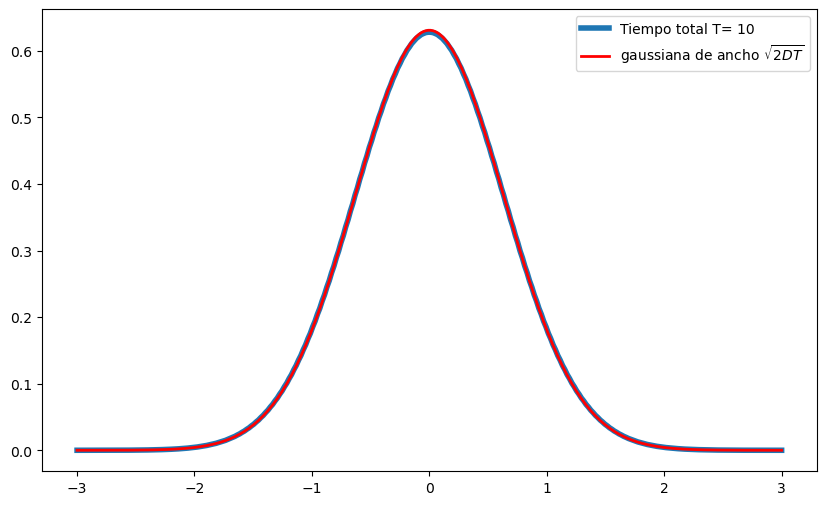

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Espaciamiento de la discretización
dx = 0.02

# Tamaño del sistema
L = 6.0

# Número de puntos
N = int(L/dx)

# Discretizamos la coordenada x
x = np.linspace(-L/2, L/2, N)


# Constante de difusión
D = 0.02

# La discretización del tiempo satisface CFT)
dt = (dx**2)/(2*D)

#dt = (dx**2)/(2*D)  # paso de tiempo
T = 10  # tiempo total

#Número de pasos de tiempo
Npasos = T/dt

# ancho de la gaussiana a tiempo T
sigma = np.sqrt(2 * D * T)

# Condición inicial: gaussiana muy angosta
c = norm.pdf(x, 0,  0.02)  # ~delta

plt.figure(figsize=(10, 6))

# evolución temporal
t = 0
while t < T:
    # Calcula la derivada segunda (condiciones periódicas de contorno)
    c_xx = (np.roll(c, -1) - 2*c + np.roll(c, 1)) / dx**2

    # actualiza usando Euler
    c += D * dt * c_xx

    t += dt

# Graficamos el estado final
plt.plot(x, c, label=f"Tiempo total T= {T}", linewidth =4)
gaussian = (1/np.sqrt(2*np.pi* sigma**2))*np.exp(-(x**2)/(2*sigma**2))
plt.plot(x, gaussian, 'r', linewidth=2, label="gaussiana de ancho $\\sqrt{2 D T}$")

plt.legend()
plt.show()


##Caminante aleatorio en una dimensión <a name="cite_note-3"></a> [^](#cite_ref-3)


Consideramos un caminante muy indeciso (aleatorio) en una dimensión espacial. El caminante parte de la posición $x=0$ y luego de cada intervalo de tiempo $\Delta t$ puede haber avanzado una distancia ($\Delta x$) a la derecha o a la izquierda (esto es desplazarse en $-\Delta x$) con la misma probabilidad.

En in intervalo de tiempo $T$ el caminante da $N=T/\Delta t$ pasos y por el teorema central del límite esperamos que la probabilidad de encontrarlo en la posición $x$ esté dada por una distribución gaussiana centrada en cero (hay simetría entre izquierda y derecha) con ancho $\sigma = \sqrt{N}\,\Delta x$

En el programa de abajo, comenzamos con 100000 caminantes en $x=0$ y esperamos que den $N$ pasos cada uno, luego hacemos un histograma con las posiciones finales de los caminantes y normalizamos con el número de caminantes. El resultado es una aproximación de la distribución de probabilidad de encontrar un caminante en la posición $x$ luego de un tiempo $T$.
Comparamos con la distribución gaussiana (normal):
$$
N(0,\sigma)= \frac{1}{\sqrt{2\pi} \sigma} e^{-x^2/(2\sigma^2)}.
$$


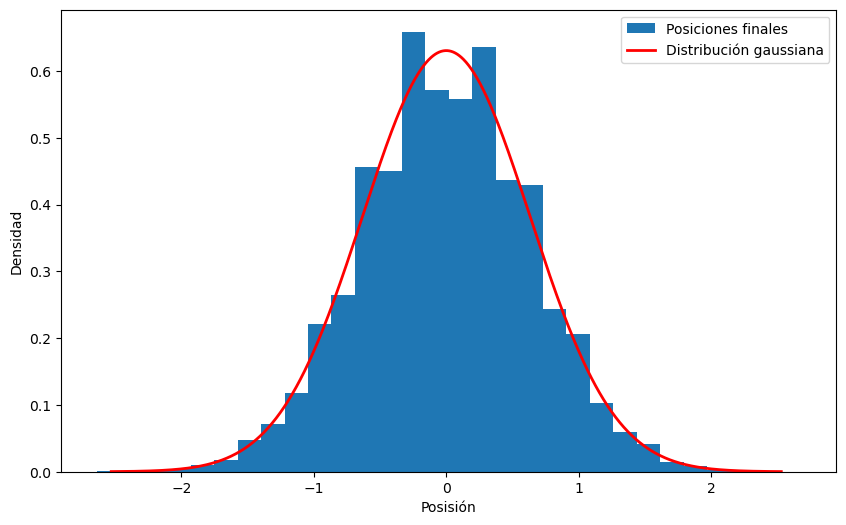

In [2]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Número de caminantes
N = 100000

# Paso de tiempo
dt = 0.01

# Tiempo total
T = 10

# Número de pasos de cada caminante
Npasos = int(T/dt)

# Tamaño del paso
dx = 0.02

# Posiciones finales
pos_fin = np.zeros(N)

# Todos caminan Npasos pasos
for i in range(Npasos):
    # vector de N valores elegidos al azar entre -1 y 1 con igual probabilidad
    cami_pasos = np.random.choice([-1, 1], size=N)
    pos_fin += dx * cami_pasos

# Graficamos el histograma
plt.figure(figsize=(10, 6))
plt.hist(pos_fin, bins=30, density=True, label="Posiciones finales")

# Comparamos con una gaussiana centrada en cero y ancho sigma = sqrt(T dx**2/dt)

sigma2 = dx**2 * T/dt
x = np.linspace(-4 * dx * np.sqrt(Npasos), 4 * dx * np.sqrt(Npasos), 1000)
gaussiana = (1/np.sqrt(2*np.pi*sigma2))*np.exp(-(x**2)/(2*sigma2))
plt.plot(x, gaussiana, 'r', linewidth=2, label="Distribución gaussiana")

plt.xlabel("Posisión")
plt.ylabel("Densidad")
plt.legend()
plt.show()



 Llegamos al mismo resultado.



## Caminantes y ecuación de difusión

Veamos, sin ser rigurosos, cómo se relaciona el problema de un caminante aleatorio con la ecuación de difusión.

Si miramos lo que ocurre entre las posiciones $x_i=i\Delta x$ y $x_{i+1}=(i+1)\Delta x$, la probabilidad de que el caminate pase de $x_i$ a $x_{i+1}$ al tiempo $t+\Delta t$ es $\phi(x_i,t)/2$, donde $\phi(x_i,t)$ es la probabilidad de que el caminante haya estado en $x_i$ a tiempo $t$. La probabilidad de que pase en la dirección contraria es $\phi(x_{i+1},t)/2$.

Supongamos ahora que tenemos un conjunto de caminantes independientes. El flujo neto de caminantes $J$, es decir, la diferencia entre los que avanzan de $x_i$ a $x_{i+1}$ y los que hacen lo contrario en un intervalo de tiempo $\Delta t$ es:
$$ J \propto (\phi(x_i, t) - \phi(x_{i+1}, t)) $$


Ahora, si suponemos que $\phi(x_i, t)$ varía suavemente con $x_i$ y que $\Delta x\to 0$, podemos aproximar la diferencia $\phi(x_i, t) - \phi(x_{i+1}, t)$ por el gradiente de la probabilidad multiplicado por $-\Delta x$. Reordenando queda:

$$ J \propto -\frac{d\phi}{dx} $$

Llamamos $D$ a la constante de proporcionalidad y llegamos a la primera ley de Fick:

$$ J = -D \frac{d\phi}{dx} $$

Donde $D$ es el coeficiente de difusión. Esta ecuación describe el comportamiento de un sistema en el que las partículas (en este caso, los "caminantes") se desplazan desde regiones de alta concentración a regiones de baja concentración.

Usando la ecuación de conservación de la probabilidad de encontrar un caminante (la variación de la probabilidad en un punto dado es igual a la diferencia de flujos entrantes y salientes)
$$ \frac{\partial \phi}{\partial t} = -\frac{\partial J}{\partial x} $$

y substituyendo la ley de Fick.

$$ \frac{\partial \phi}{\partial t} = \frac{\partial}{\partial x} \left(D \frac{\partial \phi}{\partial x}\right) $$

Si $D$ es independiente de $x$ (sistema homogéneo), esto se simplifica a la ecuación de difusión:

$$ \frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2} $$

En tres dimensiones:
$$ \frac{\partial \phi}{\partial t} = D \nabla^2 \phi, $$
que es igual a la del calor.

## Estabilidad FTCS para la ecuación de difusión <a name="cite_note-CFL"></a>1. [^](#cite_ref-CFL)


Vamos a analizar la estabilidad del esquema numérico FTCS aplicado a la ecuación del calor. Vamos a suponer que tenemos un error $\epsilon(x)$ en la solución y queremos ver cómo evoluciona al aplicar FTCS.

Como el problema tiene invariancia de traslación espacial (usamos condiciones periódicas de contorno) y es lineal, va a ser conveniente escribir al error como una serie de Fourier:

$$
\epsilon_j^n = \epsilon(j\Delta x,n\Delta t) =\sum_k \xi_k^n e^{i k j\Delta x}
$$

La linealidad nos permite aplicar la ecuación del calor a cada término y la invariancia de traslación hace que no se "mezclen" términos con $k$ diferente. Esto es: si aplicamos la ecuación del calor a uno de los términos no nos van a aparecer términos con vectores de onda diferentes a $k$.

Nos vamos a quedar con un solo término de la serie $\xi_k^n e^{i k j\Delta x}$ y ver cómo evoluciona bajo FTCS:
\begin{equation}
u^{n+1}_i = u^n_i + D \frac{\Delta t}{(\Delta x)^2}(u^n_{i+1} - 2u^n_i + u^n_{i-1})
\end{equation}
Nos queda:
$$
\xi_k^{n+1} e^{i k j\Delta x}=\xi_k^{n} e^{i k j\Delta x} + D \frac{\Delta t}{(\Delta x)^2}\xi_k^{n} e^{i k j\Delta x}(e^{i k \Delta x} - 2 + e^{-i k \Delta x})
$$
simplificando:
$$
\xi_k^{n+1} =\xi_k^{n} \left(1 + D \frac{2 \Delta t}{(\Delta x)^2}(\cos(k \Delta x) - 1 )\right)
$$

y usando la identidad $\sin^2\theta/2= (1-\cos\theta)/2$ tenemos:
$$
G_k=\frac{\xi_k^{n+1}}{\xi_k^{n}}=1-D \frac{4 \Delta t}{(\Delta x)^2}\sin^2\frac{k \Delta x}{2}
$$

por lo que luego de m pasos de tiempo tenemos un factor $(G_k)^m$.
Si $|G_k|>1$ el error va a aumentar exponencialmente. Vamos a pedir entonces $|G_k|\leq 1$, para todos los valores de $k$. Como el término de la derecha en $G_k$ es negativo lo que se tiene que cumplir es que $G_k\geq-1$ o
$$
D \frac{4 \Delta t}{(\Delta x)^2}\sin^2\frac{k \Delta x}{2}\leq 2,\,\quad \forall k
$$
Tomando el peor caso posible ($k\Delta x=\pi$) nos queda:
$$
\begin{equation}
\Delta t \leq \frac{(\Delta x)^2}{2D}
\end{equation}
$$
Más físicamente, el requisito para el paso de tiempo es que tiene que ser más corto que el tiempo típico de propagación de una perturbación una distancia $\Delta x$.

Los $\Delta t$ que resultan suelen ser muy chicos, por lo que el método se vuelve muy lento.

En otros problemas de EDPs como el de advección el método FTCS es inestable para cualquier valor de $\Delta t$ por lo que hay que recurrir a métodos implícitos <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).

Para algunos sistemas de EDP no se sabe si la solución existe ni si es única. Responder esa pregunta para las ecuaciones de Navier-Stokes es uno de los [problemas del milenio](https://www.claymath.org/millennium/navier-stokes-equation/).

El grupo de [Mecánica Computacional](http://mecom.cnea.gov.ar/) del Centro Atómico Bariloche se dedica, en gran parte, a estudiar problemas de EDP.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Ver por ejemplo las notas de G. Abramson.
